In [ ]:
import numpy as np
#NumPy is a python library used for working with arrays.
#It also has functions for working in domain of linear algebra, fourier transform, 
#and matrices.
import pandas as pd 
#it offers data structures and operations for manipulating numerical tables and time series. 
import os
import matplotlib.pyplot as plt
#Matplotlib is a comprehensive library for creating static, animated, and 
#interactive visualizations in Python.
import seaborn as sns

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
#UTF-8 is a variable-width character encoding standard 
#that uses between one and four eight-bit bytes to represent all valid Unicode code points.

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

data=pd.read_csv("/kaggle/input/student-grade-prediction/student-mat.csv")
data.head()

# Information about Dataset

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. 

Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

these grades are related with the course subject, Math or Portuguese:

      * G1 - first period grade (numeric: from 0 to 20)
      * G2 - second period grade (numeric: from 0 to 20)
      * G3 - final grade (numeric: from 0 to 20, output target)
    
## Attribute Information:

    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - 1 hour)
    studytime - weekly study time (numeric: 1 - 10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)
    



In [ ]:
data.info()

In [ ]:
data = data.drop(labels= ['guardian', 'nursery','address','failures'], axis=1)

In [ ]:
# Dropping the duplicate rows
duplicate_rows_data = data[data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_data.shape)

In [ ]:
data = data.drop_duplicates()
data.count()

In [ ]:
#Dropping the missing or null values.
# Dropping the missing values.
data = data.dropna() 
data.count()

# REGRESSION
Regression models are used to predict a continuous value. Predicting prices of a house given the features of house like size, price etc is one of the common examples of Regression. It is a supervised technique.

* Types of Regression

   1. Simple Linear Regression
   2. Polynomial Regression
   3. Support Vector Regression
   4. Decision Tree Regression
   5. Random Forest Regression
   
### Simple Linear Regression

This is one of the most common and interesting type of Regression technique. Here we predict a target variable Y based on the input variable X. A linear relationship should exist between target variable and predictor and so comes the name Linear Regression.Consider predicting the salary of an employee based on his/her age. We can easily identify that there seems to be a correlation between employee’s age and salary (more the age more is the salary). The hypothesis of linear regression is

* Y=a+bX

Y represents salary, X is employee’s age and a and b are the coefficients of the equation. So in order to predict Y (salary) given X (age), we need to know the values of a and b (the model’s coefficients).While training and building a regression model, it is these coefficients which are learned and fitted to training data. The aim of the training is to find the best fit line such that cost function is minimized. The cost function helps in measuring the error. During the training process, we try to minimize the error between actual and predicted values and thus minimizing the cost function.

### Polynomial Regression

In polynomial regression, we transform the original features into polynomial features of a given degree and then apply Linear Regression on it. Consider the above linear model Y = a+bX is transformed into something like

* Y=a+bX+cX^2

It is still a linear model but the curve is now quadratic rather than a line. Scikit-Learn provides PolynomialFeatures class to transform the features.
If we increase the degree to a very high value, the curve becomes overfitted as it learns the noise in the data as well.

### Support Vector Regression

In SVR, we identify a hyperplane with maximum margin such that the maximum number of data points are within that margin. SVRs are almost similar to the SVM classification algorithm. Instead of minimizing the error rate as in simple linear regression, we try to fit the error within a certain threshold. Our objective in SVR is to basically consider the points that are within the margin. Our best fit line is the hyperplane that has the maximum number of points.
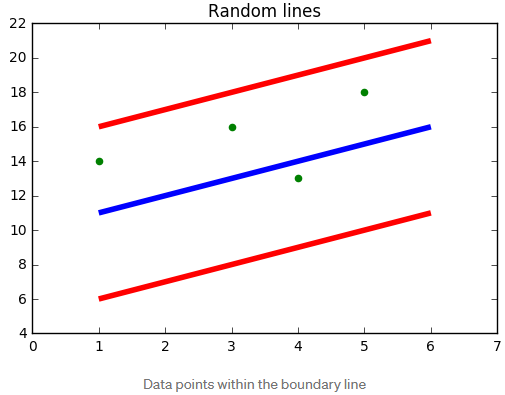
In simple regression we try to minimise the error rate. While in SVR we try to fit the error within a certain threshold. This might be a bit confusing but let me explain.

    Kernel: The function used to map a lower dimensional data into a higher dimensional data.
    
    Hyper Plane: In SVM this is basically the separation line between the data classes. Although in SVR we are going to define it as the line that will will help us predict the continuous value or target value.
    
    Boundary line: In SVM there are two lines other than Hyper Plane which creates a margin . The support vectors can be on the Boundary lines or outside it. This boundary line separates the two classes. In SVR the concept is same.
    
    Support vectors: This are the data points which are closest to the boundary. The distance of the points is minimum or least.
   

### Decision Tree Regression  
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

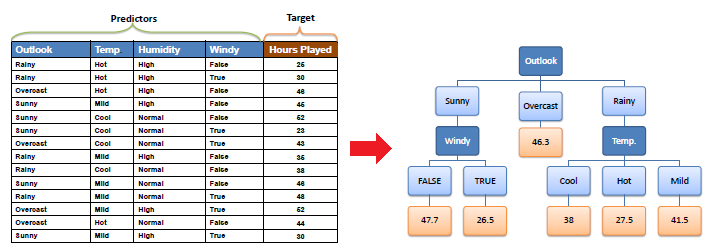

The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. The ID3 algorithm can be used to construct a decision tree for regression by replacing Information Gain with Standard Deviation Reduction.
Standard Deviation : A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). We use standard deviation to calculate the homogeneity of a numerical sample. If the numerical sample is completely homogeneous its standard deviation is zero.

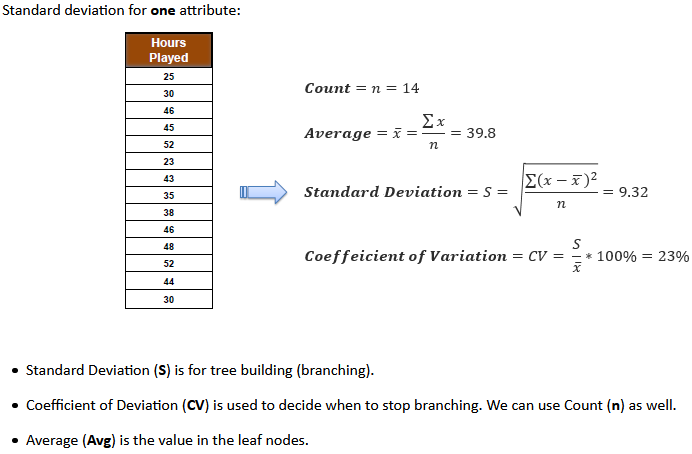
Standard Deviation Reduction 		
The standard deviation reduction is based on the decrease in standard deviation after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest standard deviation reduction (i.e., the most homogeneous branches).

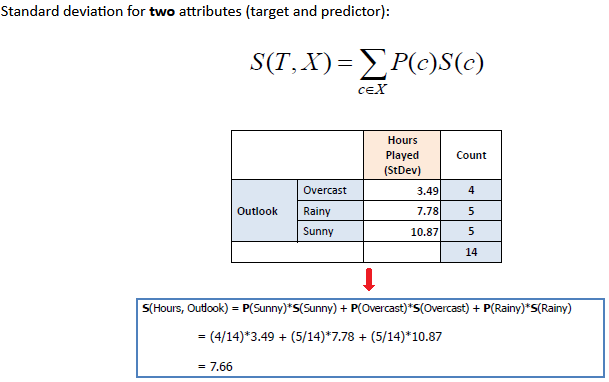

### Random Forest Regression

Random forest is an ensemble approach where we take into account the predictions of several decision regression trees.

    1. Select K random points
    2. Identify n where n is the number of decision tree regressors to be created. Repeat steps 1 and 2 to create several regression trees.
    3. The average of each branch is assigned to the leaf node in each decision tree.
    4. To predict output for a variable, the average of all the predictions of all decision trees are taken into consideration.
 Random Forest prevents overfitting (which is common in decision trees) by creating random subsets of the features and building smaller trees using these subsets.    

In [ ]:
data.info()

In [ ]:
data.head(5)

In [ ]:
x = np.array(data.loc[:,'studytime']).reshape(-1,1)
y = np.array(data.loc[:,'G1']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x,y)
plt.xlabel('studytime')
plt.ylabel('G1')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x,y)
plt.xlabel('studytime')
plt.ylabel('G1')
plt.show()